In [3]:
#R code used in Module: Introduction and Measuring Risk and Return

#Installing packages as needed

#NOTE: This statement essentially checks if PerformanceAnalytics package is available
#locally in your R library distribution. If not, it will install it and then include it
#as a part of this code, so that we can use its functions and features
if (!require(PerformanceAnalytics)) install.packages("PerformanceAnalytics")
if (!require(xts)) install.packages("xts")
if (!require(lubridate)) install.packages("lubridate")

In [10]:
#Package Details
#1)Performanceanalytics: A very useful package for investment and financial performance and risk 
#analytics. Official Documentation: https://www.rdocumentation.org/packages/PerformanceAnalytics/versions/1.5.3
#Presentation Deck by Package Founders: http://past.rinfinance.com/RinFinance2009/presentations/PA%20Workshop%20Chi%20RFinance%202009-04.pdf
#Quick Video on calculating returns: https://www.youtube.com/watch?v=0rAVPUNf9yI

#2) xts: xts is a useful packge useful in time-series analysis. We use xts package here since
#PerformanceAnalytics functions usually require xts objects (time-series of prices etc.) rather than simple
#lists of prices for more accurate performance evaluation

#3) lubridate: lubridate is a date mainpulation package. We use mdy() function of lubridate to standardize dates of our data 
#Useful Resource: https://raw.githubusercontent.com/rstudio/cheatsheets/master/lubridate.pdf

# calling libraries
library(PerformanceAnalytics)
library(xts)
library(lubridate)

In [5]:
############### Video 1: Simple and Compound Interest

#Before running this code - please make sure that contrafund.csv is in your working directory
#use getwd() to find out your working directory and setwd() to set it to any directory you want

#load data and create xts dataset
fund <- read.csv("contrafund.csv")

#converting dates to standard YYYY-MM-DD format
fund$Date <- mdy(fund$Date)
#Sorting data by dates
fund2<- fund[order(fund$Date),]

#create an xts dataset
All.dat <- xts(fund2[,-1],order.by = fund2[,1],)

,ContraRet
Cumulative Return,141.5677


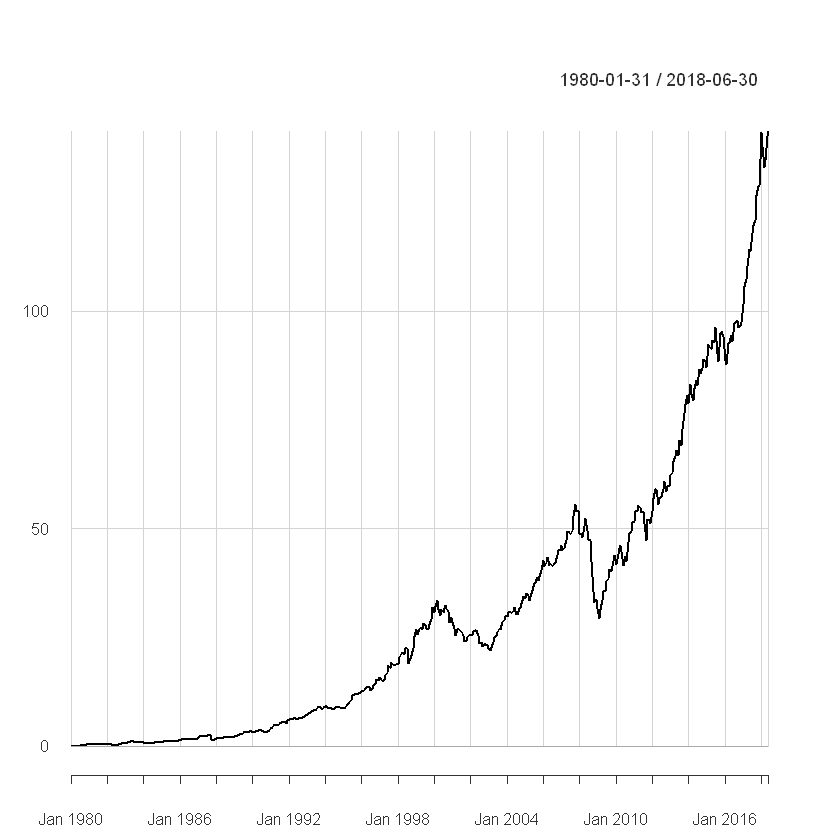

In [6]:
#Calculate Compound Return for the fund across all the data
Return.cumulative(All.dat$ContraRet,geometric = TRUE)


#Cumulative Returns chart over time
#Check chart in Plots Tab on bottom right in R Studio
chart.CumReturns(All.dat$ContraRet,wealth.index = FALSE, geometric = TRUE)

In [7]:
############### Video 2: Measuring Risk

#Descriptive Statistics of the fund returns
#IMPORTANT NOTE - Arithmetic mean and standard deviation of returns are reported incorrectly
#The correct values as noticed when this code is run are:
#Arithmetic Mean Return = 1.17% and Standard Deviation = 4.32% per month
table.Stats(All.dat$ContraRet)

,ContraRet
Observations,462.0000
NAs,0.0000
Minimum,-0.2888
Quartile 1,-0.0128
Median,0.0125
Arithmetic Mean,0.0117
Geometric Mean,0.0108
Quartile 3,0.0387
Maximum,0.1475
SE Mean,0.0020


In [8]:
#Beta and R-squared estimation: 
Mod1 = lm(ContraRet ~ Market.Return,data= All.dat)
summary(Mod1)



Call:
lm(formula = ContraRet ~ Market.Return, data = All.dat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.087523 -0.009502  0.001399  0.010316  0.060957 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.0025419  0.0008485   2.996  0.00288 ** 
Market.Return 0.9004602  0.0188912  47.666  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01776 on 460 degrees of freedom
Multiple R-squared:  0.8316,	Adjusted R-squared:  0.8313 
F-statistic:  2272 on 1 and 460 DF,  p-value: < 2.2e-16


From,Trough,To,Depth,Length,To Trough,Recovery
2007-11-30,2009-02-28,2012-02-29,-0.4634,52,16,36
1987-09-30,1987-11-30,1989-04-30,-0.3416,20,3,17
2000-04-30,2003-02-28,2004-11-30,-0.3324,56,35,21
1983-05-31,1984-07-31,1985-03-31,-0.2214,23,15,8
1981-06-30,1982-07-31,1982-10-31,-0.1952,17,14,3


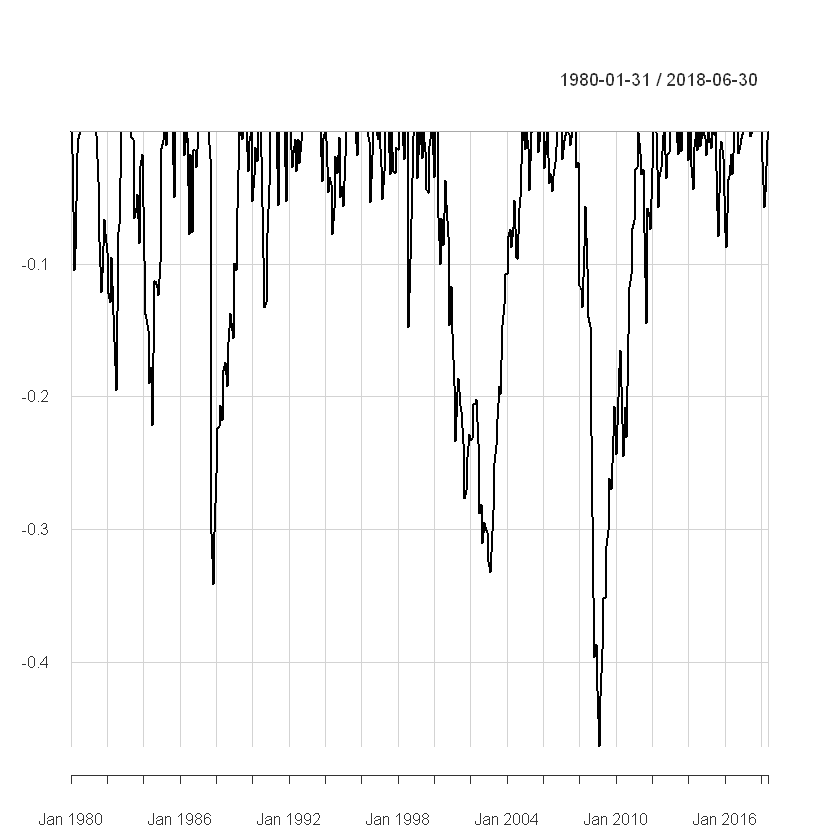

In [9]:
#As seen in model, beta = 0.9005 , Adj. R-sq = 0.8313


#Drawdowns
chart.Drawdown(All.dat$ContraRet)
table.Drawdowns(All.dat$ContraRet,top = 5,digits = 4)

##End of Code
